In [69]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage.io import imread, imsave
from PIL import Image
import glob
import os

In [91]:
image_path = '/Volumes/Shaq Toshiba/Cuba CPCe Images/201705263_ROV 17-18_424/201705263_T-15-40-04_102.jpg'
text_path = '/Volumes/Shaq Toshiba/Cuba CPCe Images/201705263_ROV 17-18_424/201705263_T-15-40-04_102.cpc'

# load true dimensions of the image
image = imread(image_path)
true_length = image.shape[1]
true_width = image.shape[0]

image.shape

(2736, 3648, 3)

In [147]:
with open(text_path) as file:
    data = file.readlines()
print(data)

['"J:\\000 STEPHANIE\\2016 Cuba Cruise\\2017 Cruise Data\\Photos\\CPCE Point Count Code\\CPCe code for 2017 Cuba- FINAL 1-31-2018.txt","J:\\000 STEPHANIE\\2016 Cuba Cruise\\2017 Cruise Data\\Photos\\Photos- CPCe and Density- Horizontal\\201705263_ROV 17-18_424\\201705263_T-15-40-04_102.jpg",54720,41040,18732,14049\n', '150.0629,40889.94\n', '54569.94,40889.94\n', '54569.94,150.0602\n', '150.0629,150.0602\n', '50\n', '10496,2654\n', '9997,552\n', '2903,12191\n', '1154,14950\n', '1125,16658\n', '10823,23318\n', '4016,26049\n', '6086,25639\n', '10633,36002\n', '7595,34480\n', '12233,2714\n', '14080,1121\n', '20905,8355\n', '15427,10696\n', '15172,19226\n', '17394,17167\n', '12163,25664\n', '19894,26816\n', '20846,34539\n', '11694,40759\n', '22165,4226\n', '30707,5693\n', '29540,11307\n', '25096,8808\n', '31322,18405\n', '30069,16726\n', '23103,28183\n', '30902,31376\n', '26390,33421\n', '22246,36706\n', '37476,5002\n', '41753,7522\n', '36769,15140\n', '34133,11931\n', '42286,18275\n', '36

In [92]:
# read dimensions of image
with open(text_path) as textfile:
    first_line = textfile.readlines()[0].split(',')
    original_len = int(first_line[2])
    original_width = int(first_line[3])

In [93]:
# number of points in the image
with open(text_path) as textfile:
    count_points = int(textfile.readlines()[5])
print(count_points)

50


In [94]:
# read the coordinates of the img
with open(text_path) as textfile:
    data = textfile.readlines()[6:6+count_points]
    coordinates = np.zeros([count_points,2],dtype=np.int)
    for n in range(count_points):
        data1 = data[n].split(',')
        coordinates[n,0] = int(int(data1[0]) * true_length/original_len)
        coordinates[n,1] = int(int(data1[1]) * true_width/original_width)

/var/folders/b8/_x62wfl112g_8f32jdl3v95h0000gn/T/ipykernel_3418/11870501.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coordinates = np.zeros([count_points,2],dtype=np.int)


In [95]:
coordinates

array([[ 699,  176],
       [ 666,   36],
       [ 193,  812],
       [  76,  996],
       [  75, 1110],
       [ 721, 1554],
       [ 267, 1736],
       [ 405, 1709],
       [ 708, 2400],
       [ 506, 2298],
       [ 815,  180],
       [ 938,   74],
       [1393,  557],
       [1028,  713],
       [1011, 1281],
       [1159, 1144],
       [ 810, 1710],
       [1326, 1787],
       [1389, 2302],
       [ 779, 2717],
       [1477,  281],
       [2047,  379],
       [1969,  753],
       [1673,  587],
       [2088, 1227],
       [2004, 1115],
       [1540, 1878],
       [2060, 2091],
       [1759, 2228],
       [1483, 2447],
       [2498,  333],
       [2783,  501],
       [2451, 1009],
       [2275,  795],
       [2819, 1218],
       [2416, 1505],
       [2755, 2000],
       [2363, 1866],
       [2435, 2458],
       [2848, 2720],
       [3527,  186],
       [2935,  253],
       [3551,  557],
       [2938,  860],
       [3162, 1147],
       [3152, 1563],
       [3454, 1969],
       [3095,

In [96]:
# read the label of each coordiante and encode the label
with open(text_path) as textfile:
    label_encode = np.zeros(count_points)
    label = textfile.readlines()[6+count_points: 6+count_points+count_points]
    for m in range(count_points):
        label1 = label[m].split(",")
        label2 = label1[1]
        new_l = label2.replace('\"', '')

        if (new_l.lower() == 'agalg') or (new_l.lower() == 'aga') or (new_l.lower() == 'agalf'):
            label_encode[m] = 0
        elif (new_l.lower() == 'dcp'):
            label_encode[m] = 1
        elif (new_l.lower() == 'roc'):
            label_encode[m] = 2
        elif (new_l.lower() == 'cca'):
            label_encode[m] = 3
        elif (new_l.lower() == 'ana'):
            label_encode[m] = 4
        else:
            label_encode[m] = 5

        

In [97]:
label_encode

array([2., 5., 5., 2., 5., 2., 2., 2., 5., 5., 2., 2., 5., 2., 5., 5., 2.,
       1., 5., 5., 2., 2., 5., 5., 3., 3., 1., 5., 2., 5., 5., 5., 5., 5.,
       2., 5., 5., 5., 5., 3., 5., 5., 5., 5., 3., 2., 5., 2., 2., 5.])

In [98]:
# write to a new txt file
name_img = image_path.split('/')[5]
name_text = name_img.split('.')[0]

dir = '/Users/shagundeepsingh/Documents/coral/demo'
if not os.path.exists(dir):
    os.makedirs(dir)

name_img = image_path.split('/')[5]
name_text = name_img.split('.')[0]
file_path = os.path.join(dir, name_text + '.txt')

with open(file_path, 'w+') as newtxtfile:
    newtxtfile.write(name_img+str('\n'))
    newtxtfile.write('x,y,label\n')
    for i in range(count_points):
        x = coordinates[i, 0]
        y = coordinates[i, 1]
        label = int(label_encode[i])
        newtxtfile.write('{0},{1},{2}\n'.format(x,y,label))

In [99]:
image_path

'/Volumes/Shaq Toshiba/Cuba CPCe Images/201705263_ROV 17-18_424/201705263_T-15-40-04_102.jpg'

In [90]:

# TODO2: Make a data distribution plot
# TODO3: Make a class imbalance balancing thing
# TODO4: Data Augmentation
# TODO5: Data distribution plot

In [109]:
# save_crop_img function
 


/var/folders/b8/_x62wfl112g_8f32jdl3v95h0000gn/T/ipykernel_3418/1337537134.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coordinate = np.zeros([50,2], dtype=np.int)
/var/folders/b8/_x62wfl112g_8f32jdl3v95h0000gn/T/ipykernel_3418/1337537134.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

In [131]:
def crop_and_save_img(image_path, txt_path, crop_size, subidx):
    img_idx = str(subidx)
    coordinate = np.zeros([50,2], dtype=np.int)
    label = np.zeros(50, dtype=np.int)

    with open(txt_path) as txtfile:
        data = txtfile.readlines()[2:]

    image = imread(image_path)

    for n in range(50):
        data1 = data[n].split(',')
        label[n] = int(data1[2])
        x, y = int(data1[0]), int(data1[1])

        # Initialize an empty array for the crop with the expected shape.
        cropped_image = np.zeros((30, 30, 3), dtype=np.uint8)

        # Calculate actual crop boundaries, considering image boundaries
        start_x = max(0, x - crop_size)
        end_x = min(image.shape[1], x + crop_size)
        start_y = max(0, y - crop_size)
        end_y = min(image.shape[0], y + crop_size)

        # Crop the image segment
        crop_segment = image[start_y:end_y, start_x:end_x]

        # Calculate where to place the crop segment in the cropped_image array
        insert_at_x = max(0, crop_size - x)
        insert_at_y = max(0, crop_size - y)

        # Copy the cropped segment into the correct position of the cropped_image
        cropped_image[insert_at_y:insert_at_y+crop_segment.shape[0], insert_at_x:insert_at_x+crop_segment.shape[1]] = crop_segment

        im = Image.fromarray(cropped_image)
        
        label_folders = {
            0: "Coral",
            1: "DCP",
            2: "Rock",
            3: "Red algae",
            4: "Green algae",
            5: "Others"
        }
        folder_name = label_folders.get(label[n], "Unknown")
        save_path = f"./data/classes/{folder_name}/{folder_name}-{img_idx}-{n}.jpg"

        # Create the directory if it doesn't exist
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        im.save(save_path)


In [142]:
read_files = glob.glob('/Volumes/Shaq Toshiba/Cuba CPCe Images/201705253_ROV 17-16_422/*.txt')

for txt_path in read_files:
    base_name = os.path.basename(txt_path).split('.')[0]
    dir_path = os.path.dirname(txt_path)

    image_path = os.path.join(dir_path, base_name + '.jpg')
    
    name_idx = txt_path.split('_')[4]
    name_subidx = name_idx.split('.')[0]
    subidx = str(name_subidx)  
    
    crop_and_save_img(image_path, txt_path, crop_size=15, subidx=subidx)

/var/folders/b8/_x62wfl112g_8f32jdl3v95h0000gn/T/ipykernel_3418/4172636971.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coordinate = np.zeros([50,2], dtype=np.int)
/var/folders/b8/_x62wfl112g_8f32jdl3v95h0000gn/T/ipykernel_3418/4172636971.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

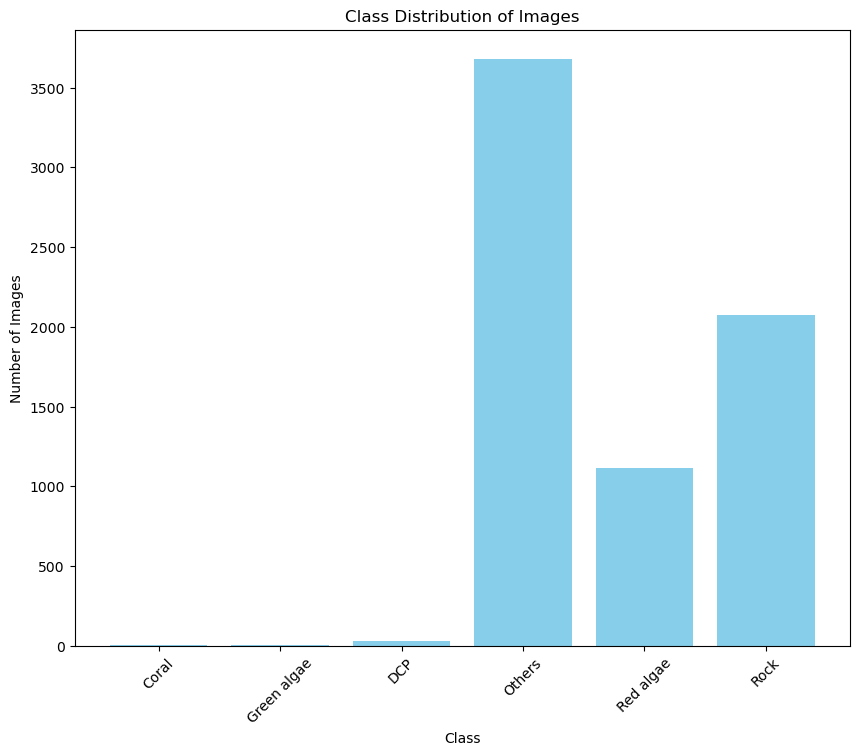

In [144]:
# class distribution

root_dir = '/Users/shagundeepsingh/Documents/coral/preprocessing/data/classes'

# Initialize a dictionary to hold the count of images in each class
class_counts = {}

# Loop through each directory in the root directory
for class_dir in os.listdir(root_dir):
    # Construct the path to the class directory
    dir_path = os.path.join(root_dir, class_dir)
    
    # Check if the path is indeed a directory (to ignore files)
    if os.path.isdir(dir_path):
        # Count the number of image files in the directory
        image_count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
        # Update the dictionary with the count of images for the class
        class_counts[class_dir] = image_count

# Plotting the class distribution
plt.figure(figsize=(10, 8))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.title('Class Distribution of Images')
plt.show()


In [145]:
class_counts

{'Coral': 8,
 'Green algae': 4,
 'DCP': 28,
 'Others': 3678,
 'Red algae': 1115,
 'Rock': 2074}

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage.io import imread


def process_image_cpc(image_path, cpc_path):
    image = imread(image_path)
    true_length, true_width = image.shape[1], image.shape[0]

    with open(cpc_path) as textfile:
        lines = textfile.readlines()
        first_line = lines[0].split(',')
        original_len, original_width = int(first_line[2]), int(first_line[3])
        count_points = int(lines[5])

        data = lines[6:6+count_points]
        coordinates = np.zeros([count_points,2], dtype=np.int64)
        labels = []
        for n, row in enumerate(data):
            data1 = row.split(',')
            coordinates[n,0] = int(int(data1[0]) * true_length / original_len)
            coordinates[n,1] = int(int(data1[1]) * true_width / original_width)
            label = lines[6+count_points+n].split(',')[1].replace('\"', '').strip()
            labels.append(label)

    return coordinates, labels

def plot_scaled_coordinates(image_path, coordinates, labels, output_path, label_color_dict):
    img = Image.open(image_path)
    dpi = 100
    figsize = img.size[0] / dpi, img.size[1] / dpi

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.imshow(img)

    for coord, label in zip(coordinates, labels):
        ax.scatter(coord[0], coord[1], s=2000, c=[label_color_dict[label]], label=label, edgecolors='black')

    ax.axis('off')
    fig.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

def create_legend_image(label_color_dict, output_path):
    unique_labels = sorted(label_color_dict.keys())
    fig, ax = plt.subplots(figsize=(2, len(unique_labels) * 0.3))
    ax.axis('off')

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                                  markerfacecolor=label_color_dict[label], markersize=10) 
                       for label in unique_labels]

    ax.legend(handles=legend_elements, loc='center', frameon=False)
    fig.savefig(output_path, bbox_inches='tight')
    plt.close(fig)

def process_directory(data_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Initialize the label color dictionary
    label_color_dict = {}

    for filename in os.listdir(data_directory):
        if filename.endswith(".jpg"):
            image_path = os.path.join(data_directory, filename)
            cpc_path = image_path.replace('.jpg', '.cpc')

            if os.path.exists(cpc_path):
                coordinates, labels = process_image_cpc(image_path, cpc_path)

                # Update the label color dictionary with new labels
                unique_labels = set(labels) - set(label_color_dict.keys())
                colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
                label_color_dict.update(zip(unique_labels, colors))

                output_image_name = filename.replace('.jpg', '_annotated.jpg')
                output_path = os.path.join(output_directory, output_image_name)
                plot_scaled_coordinates(image_path, coordinates, labels, output_path, label_color_dict)

    # Create and save the legend image after all images have been processed
    if label_color_dict:
        legend_output_path = os.path.join(output_directory, 'legend.jpg')
        create_legend_image(label_color_dict, legend_output_path)


In [9]:
data_directory = '/Volumes/Shaq Toshiba/Cuba CPCe Images/201705253_ROV 17-16_422/'  
output_directory = '/Users/shagundeepsingh/Documents/coral/preprocessing/img-data/'
process_directory(data_directory, output_directory)